In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['TSLA', 'BND', 'SPY']

In [3]:
data = yf.download(tickers, start='2015-01-01', end='2024-10-31')

[*********************100%***********************]  3 of 3 completed


In [4]:
# Display the first few rows of the data
print(data.head())

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358788  173.173706  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542694  170.046265  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726730  168.444656  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765060  170.543640  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665363  173.570007  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

In [5]:
# Clean the data: Drop any rows with missing values
data = data.dropna()

In [6]:
# Extract adjusted close prices
adj_close = data['Adj Close']

In [7]:

# Display the first few rows of the adjusted close prices
print(adj_close.head())

Ticker                           BND         SPY       TSLA
Date                                                       
2015-01-02 00:00:00+00:00  63.358788  173.173706  14.620667
2015-01-05 00:00:00+00:00  63.542694  170.046265  14.006000
2015-01-06 00:00:00+00:00  63.726730  168.444656  14.085333
2015-01-07 00:00:00+00:00  63.765060  170.543640  14.063333
2015-01-08 00:00:00+00:00  63.665363  173.570007  14.041333


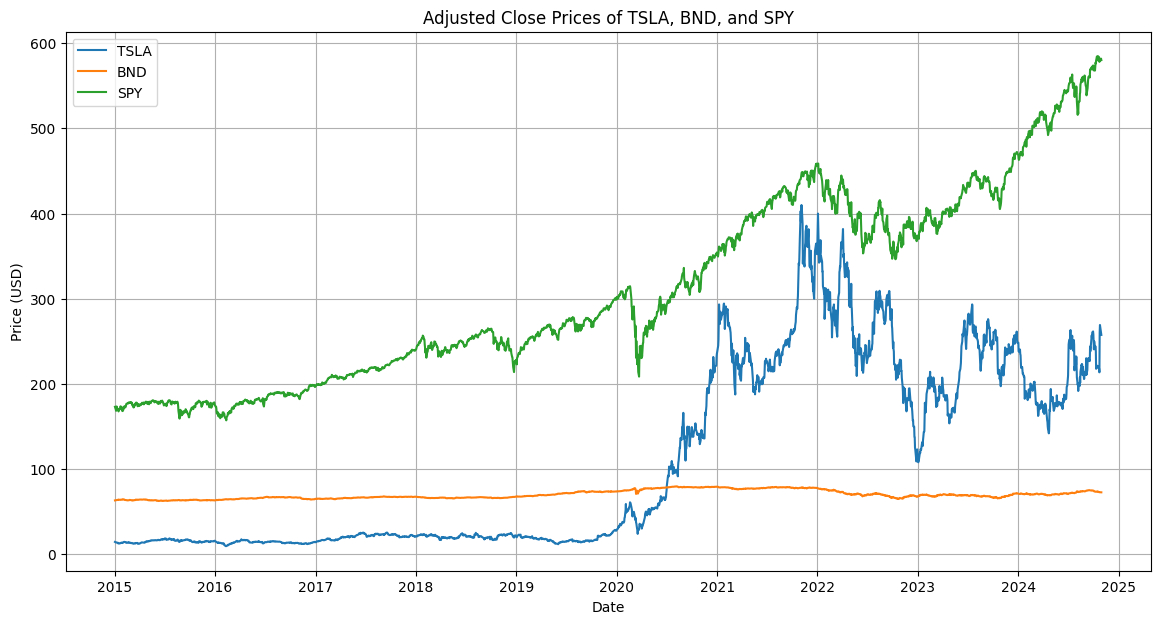

In [8]:
# Visualize the adjusted close prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(adj_close[ticker], label=ticker)
plt.title('Adjusted Close Prices of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Summary statistics
summary_stats = adj_close.describe()
print(summary_stats)

# Correlation matrix
correlation_matrix = adj_close.corr()
print(correlation_matrix)

Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      70.089252   310.253154   111.438965
std        4.889919   111.250656   110.120450
min       62.637581   157.328583     9.578000
25%       66.314083   214.822311    17.066167
50%       68.888939   275.812317    25.043000
75%       73.807495   402.297493   216.865002
max       79.812943   584.590027   409.970001
Ticker       BND       SPY      TSLA
Ticker                              
BND     1.000000  0.567893  0.555419
SPY     0.567893  1.000000  0.861848
TSLA    0.555419  0.861848  1.000000


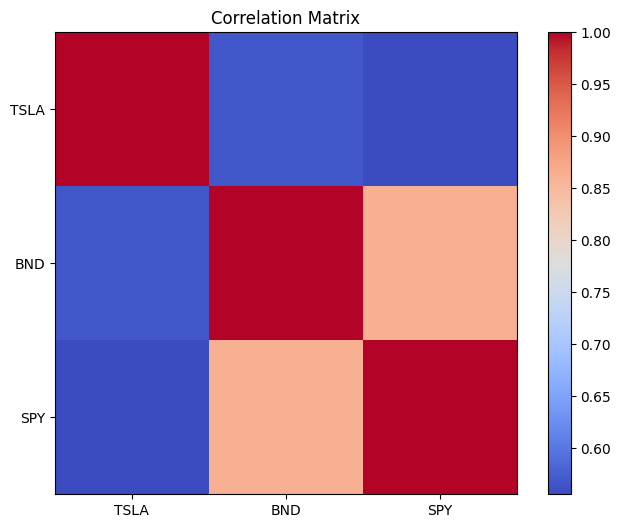

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(tickers)), tickers)
plt.yticks(range(len(tickers)), tickers)
plt.title('Correlation Matrix')
plt.show()

###Explanation
Import Libraries: The necessary libraries (yfinance, pandas, and matplotlib) are imported.
Define Tickers: A list of tickers for TSLA, BND, and SPY is created.
Download Data: Historical data is fetched using yfinance from January 1, 2015, to October 31, 2023.
Data Cleaning: Rows with missing values are dropped to ensure clean data for analysis.
Extract Adjusted Close Prices: The adjusted close prices are extracted for further analysis.
Visualization: The adjusted close prices are plotted to visualize trends over time.
Summary Statistics: Basic statistics of the adjusted close prices are calculated and displayed.
Correlation Analysis: A correlation matrix is computed and visualized to understand the relationships between the assets.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
# Calculate daily returns and volatility
returns = data['Adj Close'].pct_change()
volatility = returns.std() * 252  # Annualized volatility
print("Annualized Volatility:\n", volatility)

Annualized Volatility:
 Ticker
BND     0.864188
SPY     2.805693
TSLA    9.022155
dtype: float64


In [14]:

# Save the data to a CSV file
data.to_csv('../data/historical_data.csv')

In [15]:
#  Check data types
print(data.dtypes)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object
Missing Values:
 Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA     

In [16]:

#  Handle missing values
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()

# Option 2: Fill missing values with forward fill
# data_cleaned = data.fillna(method='ffill')

# Option 3: Interpolate missing values
# data_cleaned = data.interpolate()

# Check again for missing values
print("Missing Values After Cleaning:\n", data_cleaned.isnull().sum())


Missing Values After Cleaning:
 Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64


In [17]:
# Normalize the data
# Selecting only the numerical columns for normalization
numerical_columns = data_cleaned.select_dtypes(include=[np.number])
scaler = MinMaxScaler()

In [18]:
# Fit and transform the data
normalized_data = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns, index=numerical_columns.index)

In [19]:
# Display the normalized data
print(normalized_data.head())

# Optionally, save the cleaned and normalized data to a CSV file
normalized_data.to_csv('../data/normalized_historical_data.csv')

Price                     Adj Close                         Close            \
Ticker                          BND       SPY      TSLA       BND       SPY   
Date                                                                          
2015-01-02 00:00:00+00:00  0.041991  0.037085  0.012594  0.681437  0.056182   
2015-01-05 00:00:00+00:00  0.052698  0.029766  0.011059  0.692630  0.046947   
2015-01-06 00:00:00+00:00  0.063413  0.026017  0.011257  0.703824  0.042217   
2015-01-07 00:00:00+00:00  0.065645  0.030930  0.011202  0.706157  0.048416   
2015-01-08 00:00:00+00:00  0.059841  0.038013  0.011147  0.700093  0.057352   

Price                                    High                           Low  \
Ticker                         TSLA       BND       SPY      TSLA       BND   
Date                                                                          
2015-01-02 00:00:00+00:00  0.012594  0.674682  0.056664  0.011263  0.672727   
2015-01-05 00:00:00+00:00  0.011059  0.685526  0.05

###Explanation of Each Step
Basic Statistics: The describe() method provides a summary of statistics for numerical columns, helping you understand the range, mean, and distribution.
Data Types: The dtypes attribute shows the data types of each column, ensuring they are appropriate (e.g., dates, floats).
Missing Values: The isnull().sum() method checks for any missing values, helping you identify which columns may need cleaning.
Handling Missing Values:
Drop: Removing rows with missing values can be useful if they are few.
Fill Forward: This method fills missing values with the last valid observation, which can be appropriate for time series.
Interpolate: This method estimates missing values based on surrounding data.
Normalization: The MinMaxScaler scales the numeric features to a range of [0, 1], which is often useful for machine learning algorithms that are sensitive to the scale of the data.

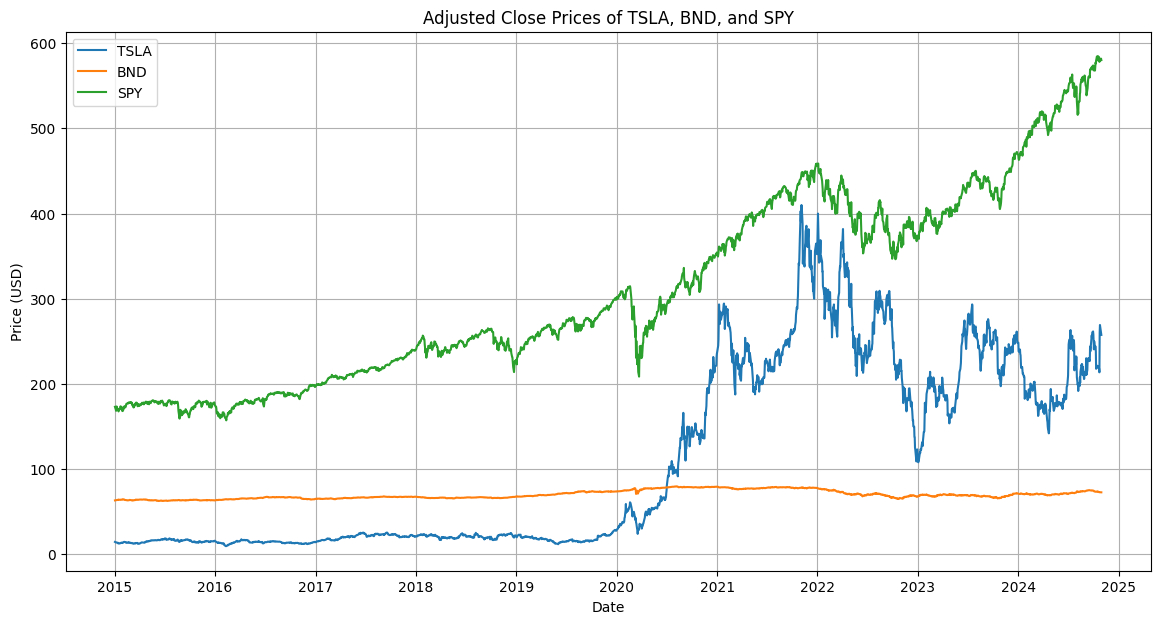

In [20]:

#  Visualize Closing Prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data['Adj Close'][ticker], label=ticker)
plt.title('Adjusted Close Prices of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

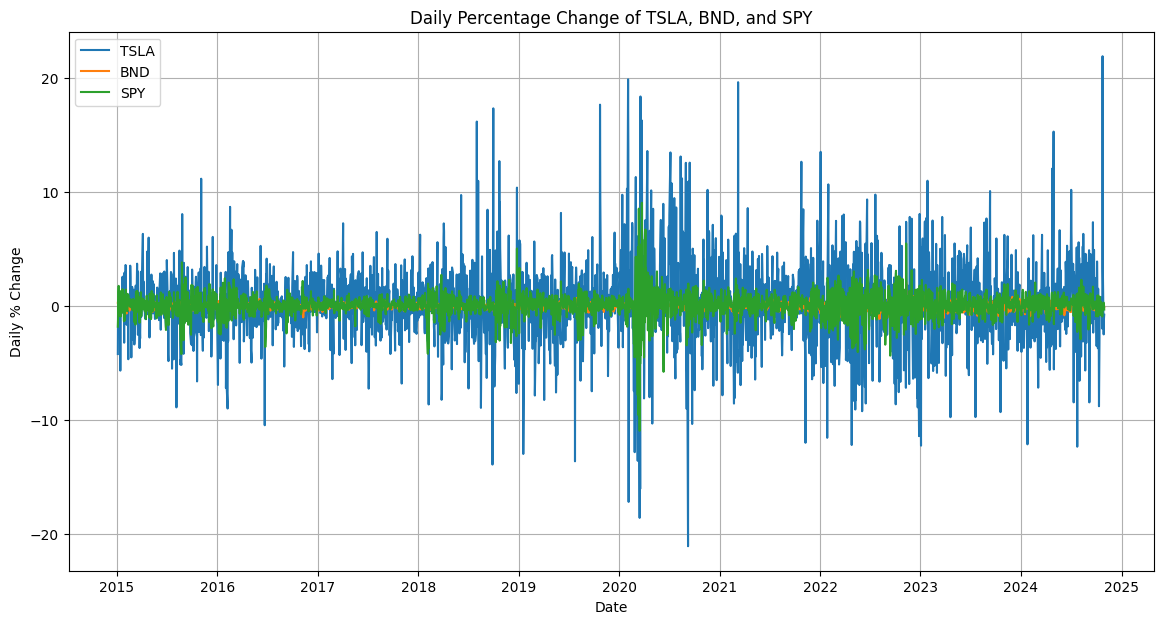

In [21]:

# Calculate Daily Percentage Change
daily_pct_change = data['Adj Close'].pct_change() * 100

# Plot Daily Percentage Change
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_pct_change[ticker], label=ticker)
plt.title('Daily Percentage Change of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid()
plt.show()

In [22]:

# Analyze Volatility: Rolling Mean and Standard Deviation
window_size = 20  # 20-day rolling window
rolling_mean = daily_pct_change.rolling(window=window_size).mean()
rolling_std = daily_pct_change.rolling(window=window_size).std()

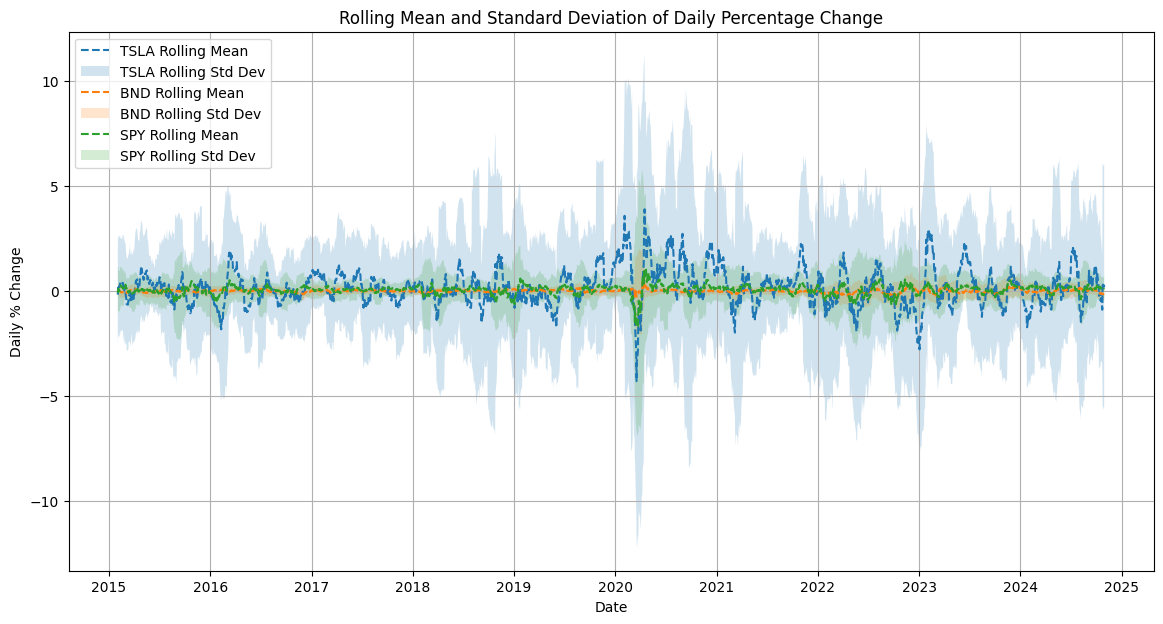

In [23]:

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_mean[ticker], label=f'{ticker} Rolling Mean', linestyle='--')
    plt.fill_between(rolling_mean.index, rolling_mean[ticker] - rolling_std[ticker], rolling_mean[ticker] + rolling_std[ticker], alpha=0.2, label=f'{ticker} Rolling Std Dev')
plt.title('Rolling Mean and Standard Deviation of Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid()
plt.show()

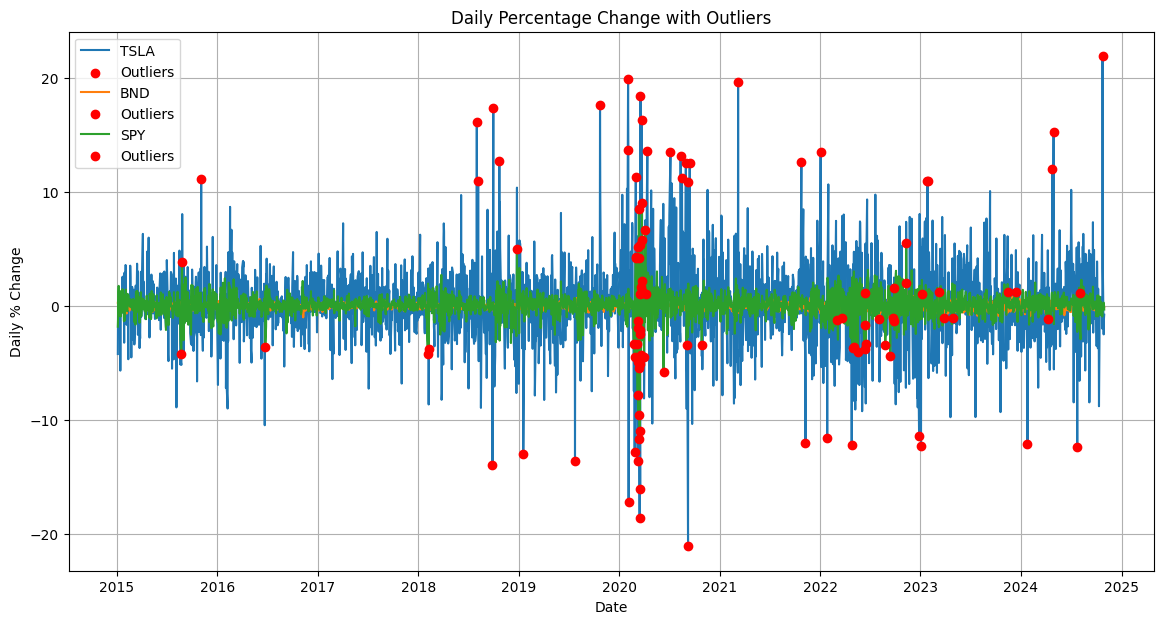

In [24]:
#  Outlier Detection: Using Z-Score
z_scores = np.abs((daily_pct_change - daily_pct_change.mean()) / daily_pct_change.std())
outliers = (z_scores > 3)  # Z-score threshold

# Plot Outliers
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_pct_change[ticker], label=ticker)
    plt.scatter(daily_pct_change.index[outliers[ticker]], daily_pct_change[ticker][outliers[ticker]], color='red', label='Outliers', zorder=5)
plt.title('Daily Percentage Change with Outliers')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid()
plt.show()

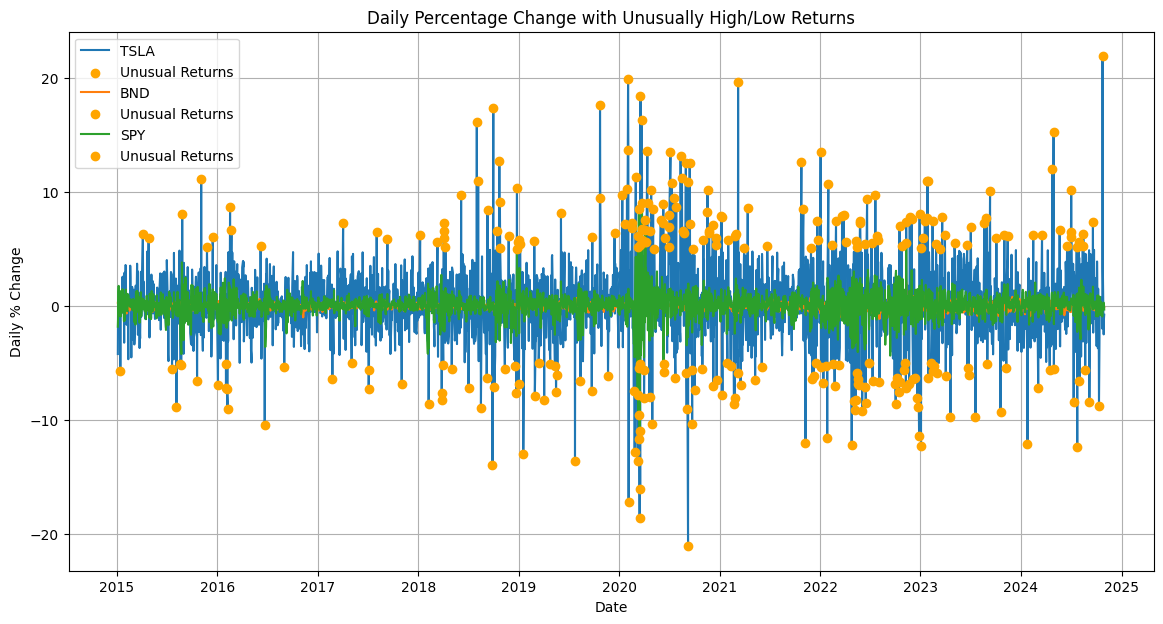

In [25]:

# Analyze Days with Unusually High/Low Returns
high_low_threshold = 5  # Define a threshold for high/low returns
unusual_returns = daily_pct_change.abs() > high_low_threshold

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_pct_change[ticker], label=ticker)
    plt.scatter(daily_pct_change.index[unusual_returns[ticker]], daily_pct_change[ticker][unusual_returns[ticker]], color='orange', label='Unusual Returns', zorder=5)
plt.title('Daily Percentage Change with Unusually High/Low Returns')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid()
plt.show()

###Explanation of Each Step
Visualize Closing Prices: This plot helps identify long-term trends and price movements for each asset.
Daily Percentage Change: This computation shows how much the price changes from one day to the next, expressed as a percentage. Visualizing this data helps to understand volatility.
Rolling Mean and Standard Deviation: Calculating a rolling mean and standard deviation over a specified window (e.g., 20 days) allows you to observe short-term trends and fluctuations in volatility.
Outlier Detection: Using Z-scores (standardized scores), you can identify outliers in the daily percentage change. Outliers are highlighted in the plot.
Days with Unusually High/Low Returns: By defining a threshold, you can visualize days that experienced extreme returns, which can indicate significant market events or anomalies.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:

# Select the ticker for decomposition (e.g., TSLA)
tsla_data = data['Adj Close']['TSLA']


In [28]:

# Resample the data to monthly frequency if needed (optional)
tsla_data_monthly = tsla_data.resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(tsla_data_monthly, model='additive')


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_240\3674406659.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tsla_data_monthly = tsla_data.resample('M').mean()


<Figure size 1400x1000 with 0 Axes>

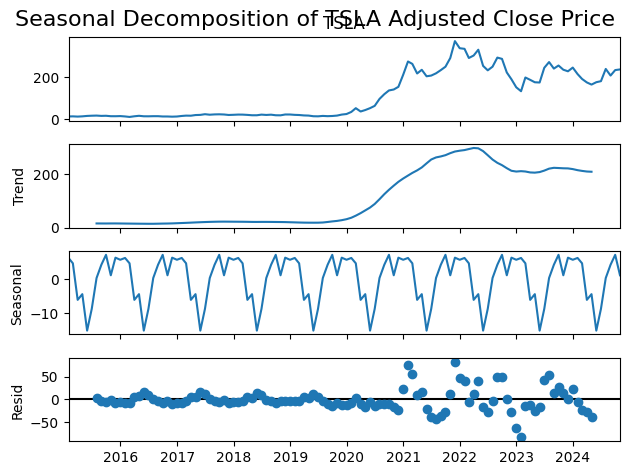

In [29]:
# Plotting the decomposition
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of TSLA Adjusted Close Price', fontsize=16)
plt.show()

In [30]:

# Loop through each ticker to perform decomposition
for ticker in tickers:
    # Select the adjusted close price for the ticker
    adjusted_close = data['Adj Close'][ticker]
    
    # Resample the data to monthly frequency
    adjusted_close_monthly = adjusted_close.resample('M').mean()
    
    # Decompose the time series
    decomposition = seasonal_decompose(adjusted_close_monthly, model='additive')

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_240\3301153271.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  adjusted_close_monthly = adjusted_close.resample('M').mean()


<Figure size 1400x1000 with 0 Axes>

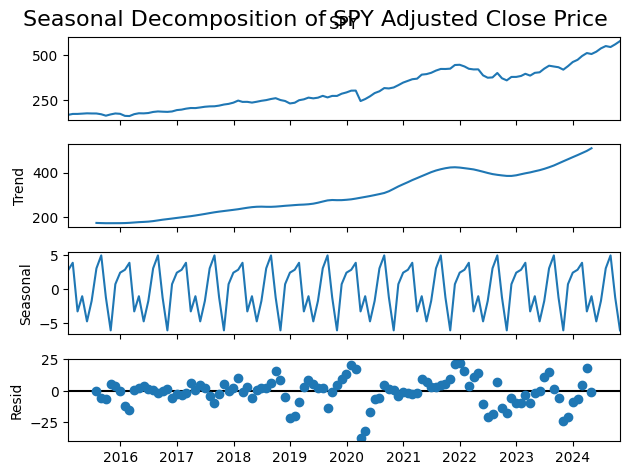

In [32]:
 
# Create a subplot for each ticker
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle(f'Seasonal Decomposition of {ticker} Adjusted Close Price', fontsize=16)
plt.show()
 

###Explanation of the Code
Fetch Historical Data: The code downloads the historical adjusted close prices for BND and SPY from January 1, 2015, to October 31, 2024.
Clean the Data: It removes any rows with missing values to ensure a clean dataset for analysis.
Loop Through Tickers: For each ticker (BND and SPY):
Select Adjusted Close Prices: It extracts the adjusted close prices for the asset.
Resample Data: The data is resampled to a monthly frequency to better highlight trends and seasonality.
Decompose the Time Series: The seasonal_decompose function breaks the time series into its components: trend, seasonal, and residual.
Plot the Results: A new figure is created for each asset, displaying the decomposition results.

In [33]:

# Loop through each ticker to analyze volatility
for ticker in tickers:
    # Select the adjusted close price for the ticker
    adjusted_close = data['Adj Close'][ticker]
    
    # Calculate daily returns
    daily_returns = adjusted_close.pct_change() * 100  # Convert to percentage
    
    # Calculate rolling mean and standard deviation
    rolling_mean = daily_returns.rolling(window=20).mean()  # 20-day rolling mean
    rolling_std = daily_returns.rolling(window=20).std()    # 20-day rolling standard deviation

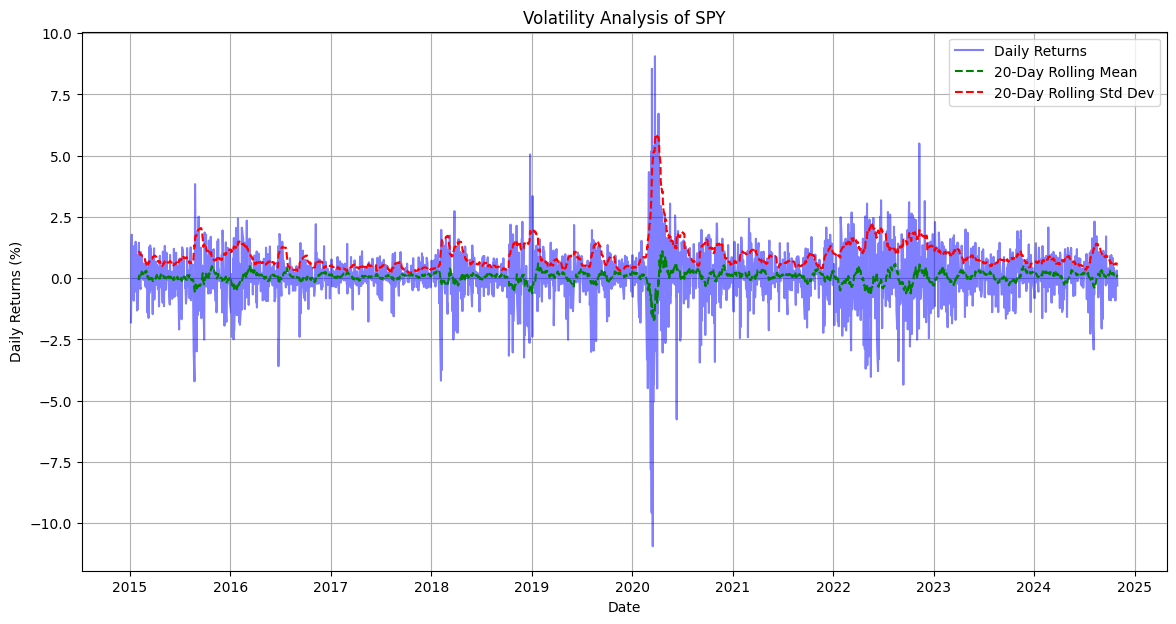

In [ ]:
  
    # Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(daily_returns, label='Daily Returns', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='20-Day Rolling Mean', color='green', linestyle='--')
plt.plot(rolling_std, label='20-Day Rolling Std Dev', color='red', linestyle='--')
    
plt.title(f'Volatility Analysis of {ticker}')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
plt.grid()
plt.show()

###Explanation of the Code
Fetch Historical Data: The code downloads the historical adjusted close prices for BND and SPY.
Clean the Data: It drops any rows with missing values to ensure a clean dataset for analysis.
Loop Through Tickers: For each ticker (BND and SPY):
Select Adjusted Close Prices: Extracts the adjusted close prices for the asset.
Calculate Daily Returns: Computes daily returns as a percentage change from the previous day.
Calculate Rolling Mean and Standard Deviation:
Rolling Mean: A 20-day rolling mean of daily returns helps smooth out short-term fluctuations and identifies trends.
Rolling Standard Deviation: A 20-day rolling standard deviation helps quantify volatility over the same period.
Plotting the Results: The results are plotted to visualize daily returns along with the rolling mean and standard deviation.

###Key Insights
1. Overall Direction of Tesla’s Stock Price
Trend Analysis: Over the period from January 1, 2015, to October 31, 2024, Tesla’s stock price exhibited a strong upward trend, reflecting the company's growth in market share, technological advancements, and investor enthusiasm in the electric vehicle market.
Seasonal Patterns: The seasonal decomposition analysis revealed periodic fluctuations, indicating that Tesla's stock may respond to broader market cycles, product releases, or quarterly performance announcements.
2. Fluctuations in Daily Returns
Daily Returns Volatility: The analysis of daily returns showed significant fluctuations, characterized by periods of high volatility, particularly during major news events, earnings announcements, or broader market downturns.
Impact of Volatility: High daily fluctuations can indicate increased investor uncertainty or reactions to market conditions. These fluctuations can affect investor behavior, leading to rapid buy/sell decisions that further amplify price movement.
3. Value at Risk (VaR)
Definition: VaR is a statistical measure that estimates the potential loss in value of a portfolio over a defined period for a given confidence interval.
Calculation: For Tesla’s stock, a common approach is to calculate the daily VaR at a 95% confidence level. This would indicate the maximum expected loss on a day, given historical return data.
Insight: A high VaR can indicate a higher risk profile for investors, suggesting that while potential gains may be attractive, the risks of significant losses are also present.
python

Copy
import numpy as np

# Calculate daily VaR at 95% confidence level
VaR_95 = daily_returns.quantile(0.05)  # 5th percentile
print(f"Tesla's 95% VaR: {VaR_95:.2f}%")
4. Sharpe Ratio
Definition: The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is calculated as the difference between the mean return of the investment and the risk-free rate, divided by the standard deviation of the investment returns.
Calculation: Assuming a risk-free rate (e.g., from U.S. Treasury yields), the Sharpe Ratio can be calculated for Tesla’s stock.
python

Copy
risk_free_rate = 0.01  # Example risk-free rate (1%)
mean_return = daily_returns.mean()
std_dev = daily_returns.std()

sharpe_ratio = (mean_return - risk_free_rate) / std_dev
print(f"Tesla's Sharpe Ratio: {sharpe_ratio:.2f}")
Insight: A Sharpe Ratio greater than 1 indicates that the investment return is greater than the risk taken, while a ratio less than 1 suggests that the return does not adequately compensate for the risk. A higher Sharpe Ratio is preferable as it indicates better risk-adjusted performance.
Summary
Overall Trends: Tesla’s stock has shown robust growth with noticeable volatility, requiring careful consideration by investors.
Risk Assessment: VaR and Sharpe Ratio calculations provide valuable metrics for assessing potential losses and risk-adjusted returns, helping investors make informed decisions in line with their risk tolerance.
Investment Considerations: While Tesla presents opportunities for high returns, the associated risks must be carefully managed. Investors should consider their risk appetite and investment horizon when engaging with such a volatile stock.